In [136]:
import pandas as pd
from pandas.core.arrays import categorical
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib as plt

In [137]:
df = pd.read_csv('telco-customer-churn1.csv')

In [138]:
df.head(9)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes


In [139]:
df.isnull().values.any() # determine if value in series missing
df = df.dropna()

In [140]:
df.dtypes # checking types of columns

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

after checking dataset, we can see that some columns types should be changed

In [141]:
# transform all data to numeric

df['customerID'] = pd.factorize(df.customerID)[0]
df['gender'] = pd.factorize(df.gender)[0]
df['Partner'] = pd.factorize(df.Partner)[0]
df['Dependents'] = pd.factorize(df.Dependents)[0]
df['PhoneService'] = pd.factorize(df.PhoneService)[0]
df['MultipleLines'] = pd.factorize(df.MultipleLines)[0]
df['InternetService'] = pd.factorize(df.InternetService)[0]
df['OnlineSecurity'] = pd.factorize(df.OnlineSecurity)[0]
df['OnlineBackup'] = pd.factorize(df.OnlineBackup)[0]
df['DeviceProtection'] = pd.factorize(df.DeviceProtection)[0]
df['TechSupport'] = pd.factorize(df.TechSupport)[0]
df['StreamingTV'] = pd.factorize(df.StreamingTV)[0]
df['StreamingMovies'] = pd.factorize(df.StreamingMovies)[0]
df['Contract'] = pd.factorize(df.Contract)[0]
df['PaperlessBilling'] = pd.factorize(df.PaperlessBilling)[0]
df['PaymentMethod'] = pd.factorize(df.PaymentMethod)[0]
df['Churn'] = pd.factorize(df.Churn)[0]

df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce') # here we change data types to float from object

df.dtypes # checking types of columns

customerID            int64
gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [142]:
df_fr_wrk = df

In [143]:
df_fr_wrk.describe() # gener sum statisticks best way to find outliers

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,3521.000000,0.504756,0.162147,0.516967,0.299588,32.371149,0.903166,1.325004,0.872923,0.720006,...,0.777226,0.723555,0.817691,0.821241,0.690473,0.407781,1.315633,64.761692,2283.300441,0.265370
std,2033.283305,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.642730,0.737796,0.796885,...,0.778826,0.795896,0.763212,0.761725,0.833755,0.491457,1.148907,30.090047,2266.771362,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,1760.500000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,401.450000,0.000000
50%,3521.000000,1.000000,0.000000,1.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,70.350000,1397.475000,0.000000
75%,5281.500000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,89.850000,3794.737500,1.000000
max,7042.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


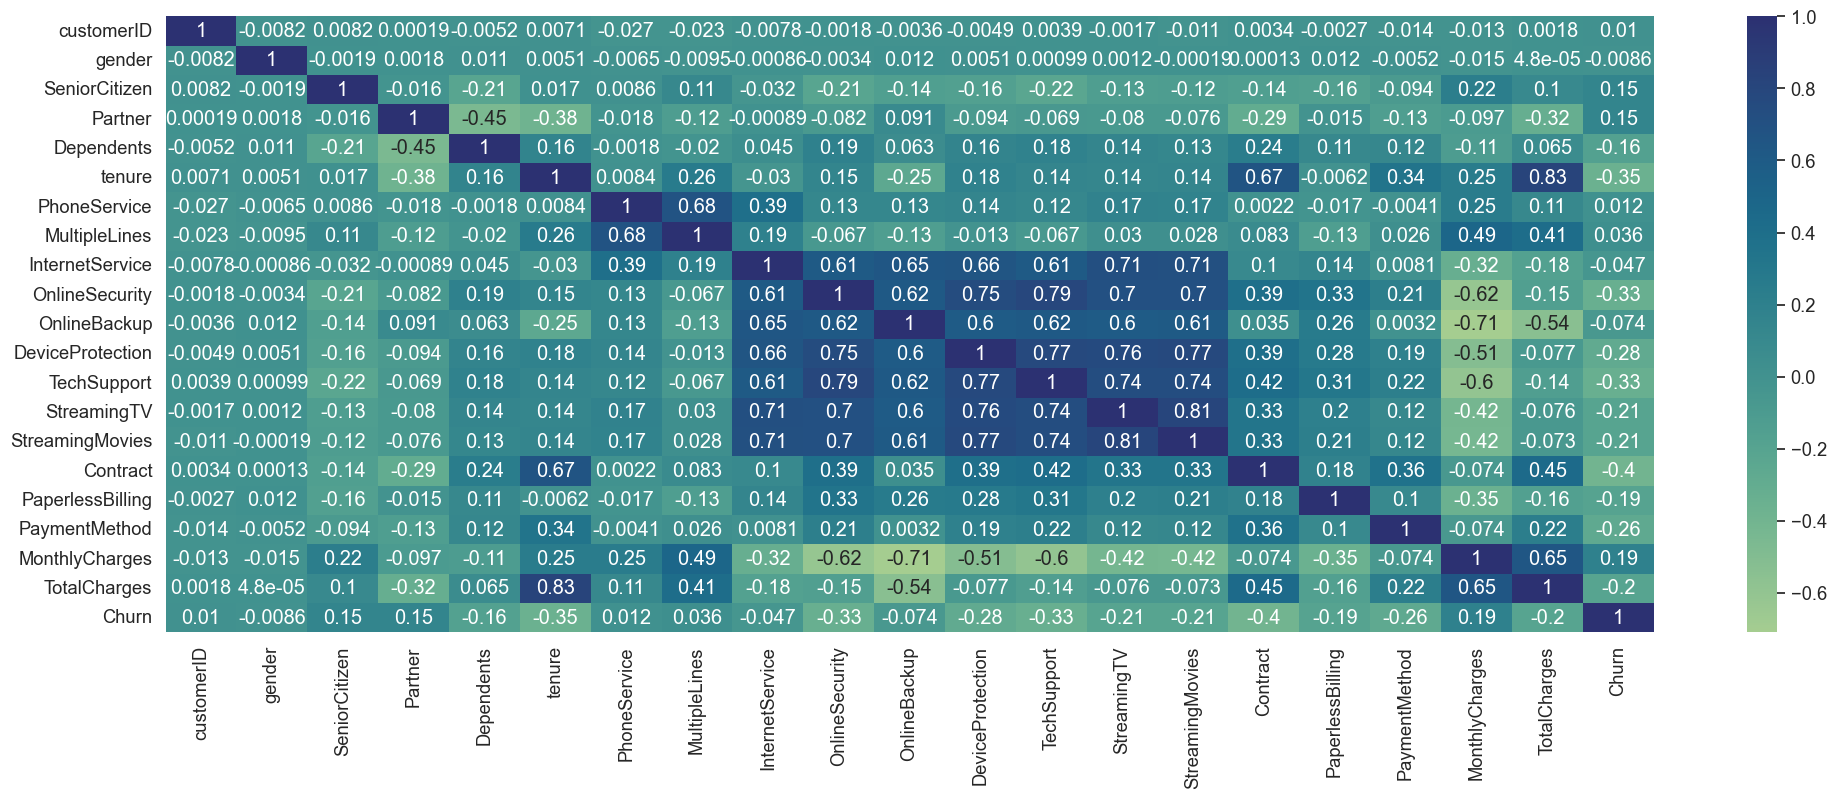

In [144]:
# Correlation between variables

cor = df.corr()
clrmap = sns.color_palette("crest", as_cmap=True)

sns.heatmap(cor,xticklabels=cor.columns,yticklabels=cor.columns, cmap=clrmap, annot=True)
sns.set(rc={'figure.figsize':(24,8)},font_scale=1.2)

4.8e-05 is 0.000048

In [145]:
df_viz = df[500:1599] #let's take some slice and take a look

In [146]:
df_fr_wrk = df_fr_wrk.dropna()

In [147]:
df_fr_wrk.isnull().sum() # how many missing values

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [148]:
from sklearn.model_selection import train_test_split

In [149]:
X = df_fr_wrk
X = df_fr_wrk.drop("Churn", axis='columns')

Y = df_fr_wrk['Churn']

In [150]:
# train, test and split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [151]:
# printing shapes of testing and training sets :
print("Shape (Orig. Dataset) :", df_fr_wrk.shape)
print("Shape input (Train set)  :", X_train.shape)
print("Shape output (Train set) :", y_train.shape)
print("Shape input (Test set)   :", X_test.shape)
print("Shape output (Test set)  :", y_test.shape)

Shape (Orig. Dataset) : (7032, 21)
Shape input (Train set)  : (5625, 20)
Shape output (Train set) : (5625,)
Shape input (Test set)   : (1407, 20)
Shape output (Test set)  : (1407,)


In [152]:
from sklearn.naive_bayes import GaussianNB

In [153]:
GNB = GaussianNB()

GNB.fit(X_train, y_train)
y_pred = GNB.predict(X_test)

y_pred

array([0, 0, 1, ..., 0, 0, 0])

<AxesSubplot: xlabel='count'>

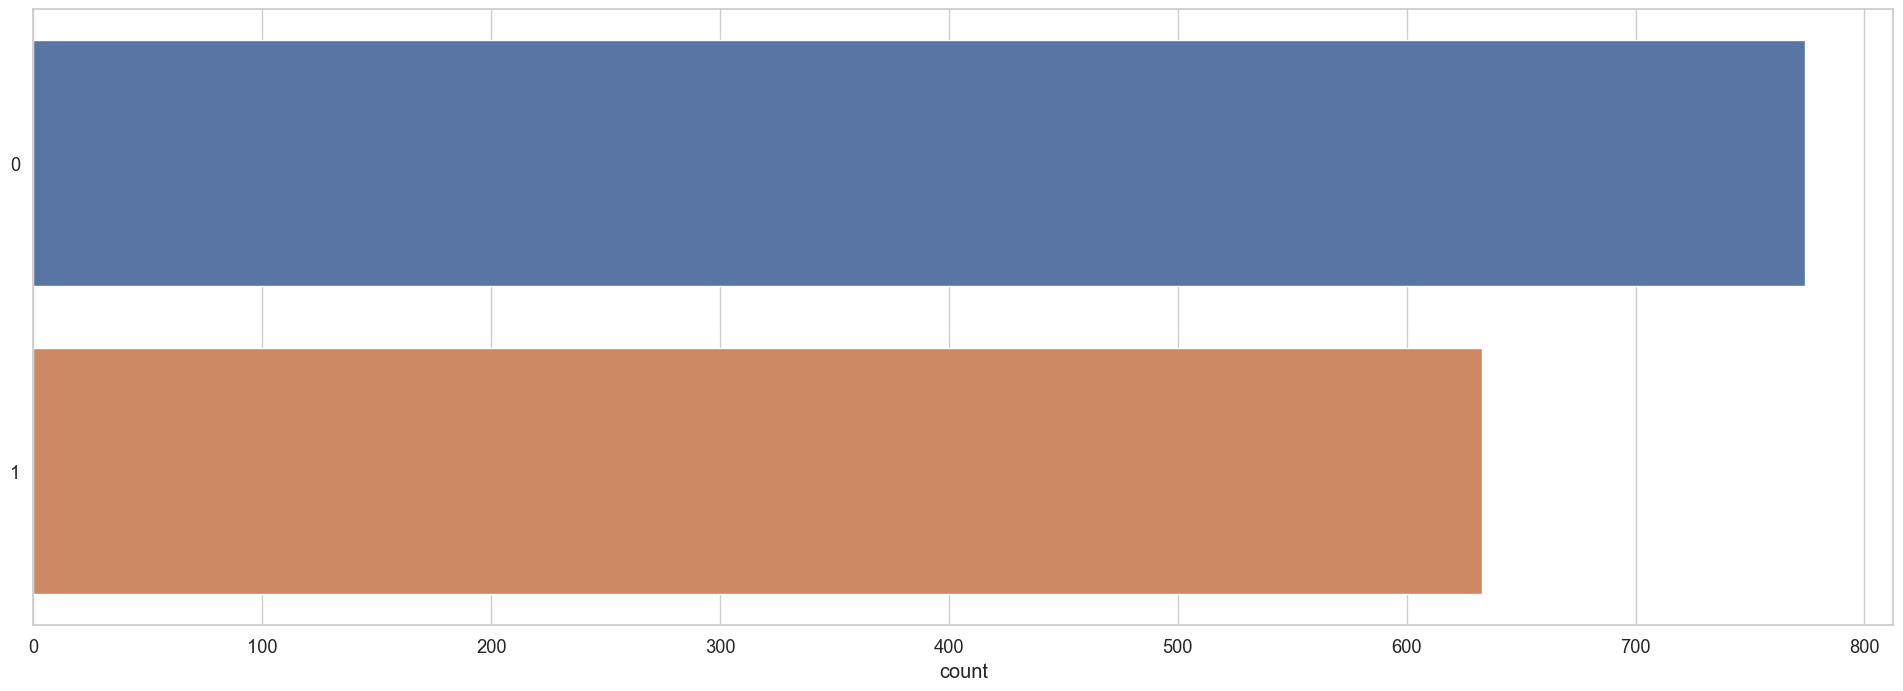

In [154]:
sns.set_style("whitegrid")
sns.countplot(y=y_pred)

In [155]:
from sklearn.metrics import accuracy_score

In [156]:
print('Model accuracy score:', accuracy_score(y_test, y_pred))

Model accuracy score: 0.7306325515280739


In [157]:
from sklearn.metrics import confusion_matrix

In [158]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[712, 317],
       [ 62, 316]])

TP FP
FN TN

Predictions:

700 + 290 = 990 correct
344 + 73 = 417 incorrect

It can change during run, but in all casses pretty good result

In [159]:
# precision, recall, f1 and support scores
from sklearn.metrics import classification_report

In [160]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.69      0.79      1029
           1       0.50      0.84      0.63       378

    accuracy                           0.73      1407
   macro avg       0.71      0.76      0.71      1407
weighted avg       0.81      0.73      0.75      1407



In [161]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [162]:
class_acc = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy :',class_acc)

class_err = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : ', class_err)

Classification accuracy : 0.7306325515280739
Classification error :  0.26936744847192606


In [163]:
from sklearn.linear_model import LogisticRegression

LGRg = LogisticRegression()

LGRg.fit(X_train, y_train)

y1_pred = LGRg.predict(X_test)

y1_pred

/Users/aristarcharistarchovich/DataspellProjects/newPython/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0, 0, ..., 0, 0, 0])

<AxesSubplot: xlabel='count'>

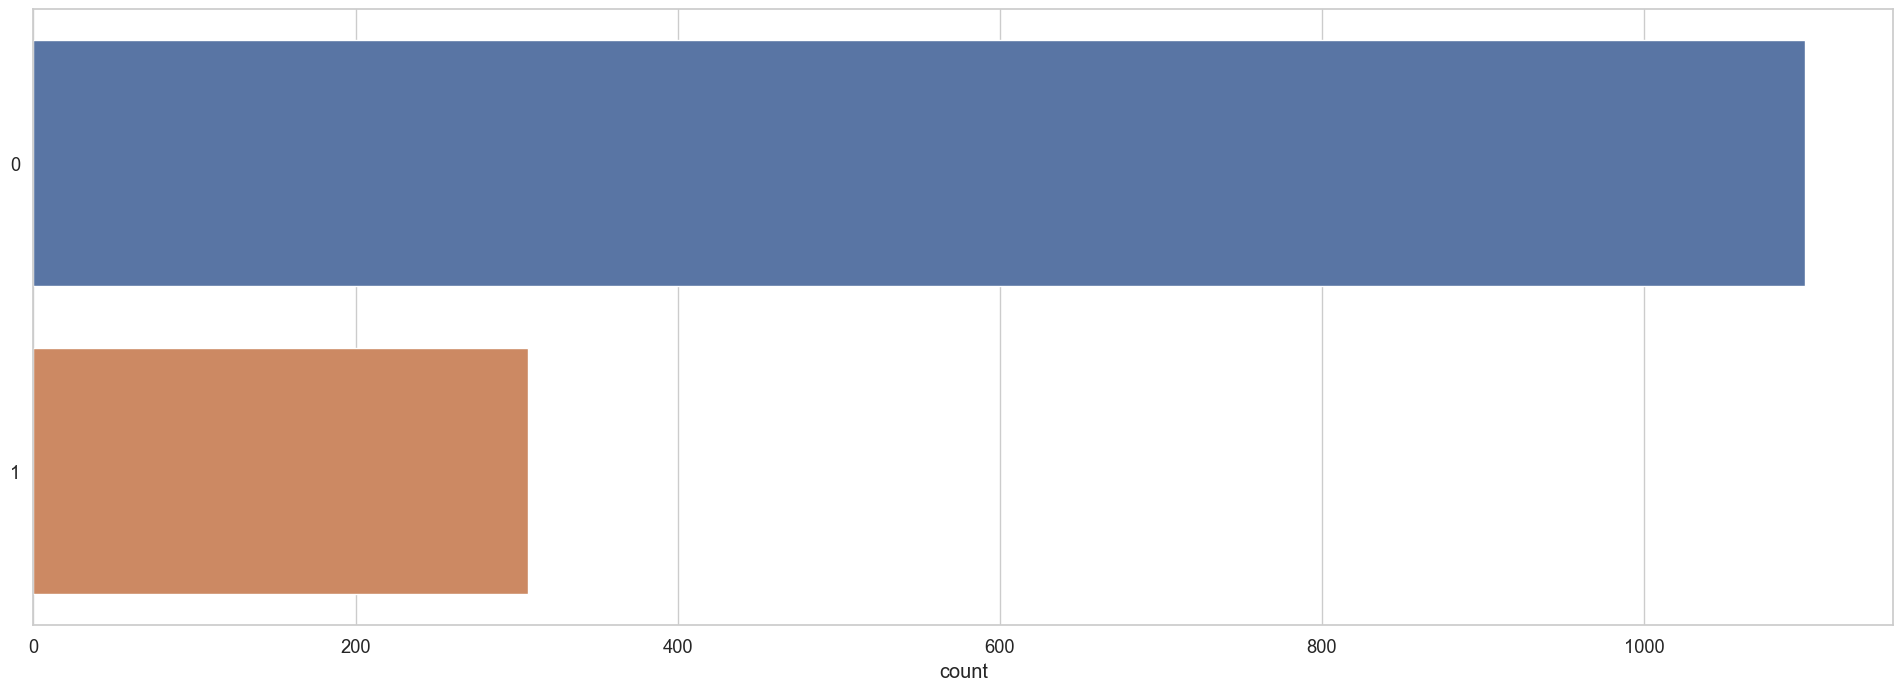

In [164]:
sns.set_style("whitegrid")
sns.countplot(y=y1_pred)

In [165]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [166]:
rand_for = Pipeline(steps = [('smote', SMOTE(random_state=42)),
                             ('standardscaler', StandardScaler()),
                             ('Random Forest', RandomForestClassifier())])
rand_for.fit(X_train, y_train)
rand_for_pr = rand_for.predict(X_test)

rand_for_pr

array([0, 0, 0, ..., 0, 0, 0])

<AxesSubplot: xlabel='count'>

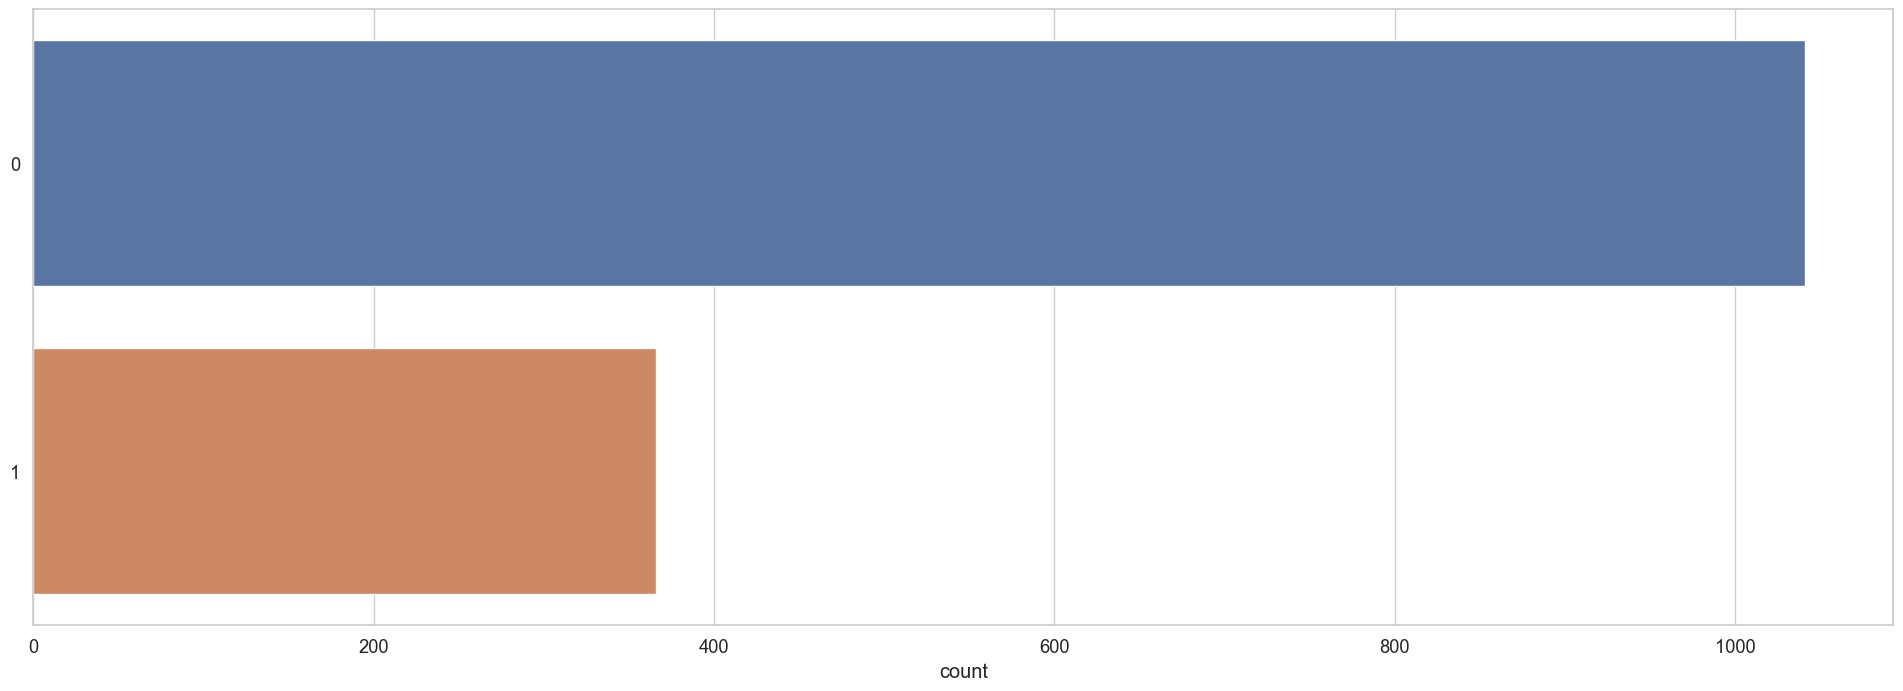

In [167]:
sns.set_style("whitegrid")
sns.countplot(y=rand_for_pr)

In [168]:
xgbr = Pipeline(steps = [('smote', SMOTE(random_state=42)),
                             ('standardscaler', StandardScaler()),
                             ('XGBoost', xgb.XGBClassifier())])
xgbr.fit(X_train, y_train)
xgbr_prd = xgbr.predict(X_test)

xgbr_prd

array([0, 0, 1, ..., 0, 0, 1])

<AxesSubplot: xlabel='count'>

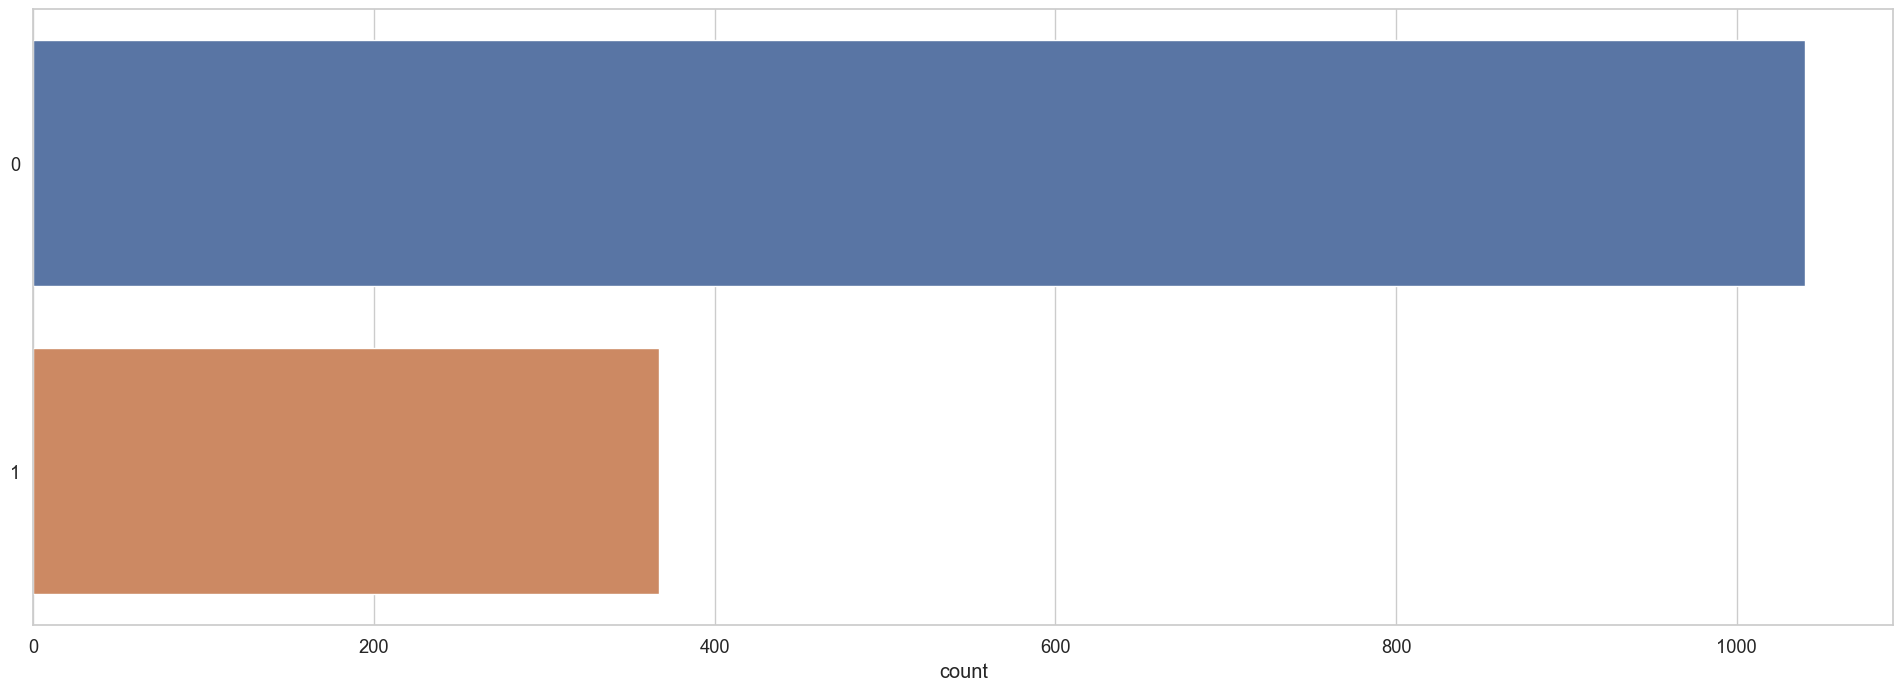

In [169]:
sns.set_style("whitegrid")
sns.countplot(y=xgbr_prd)